In [70]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque
from matplotlib.animation import FuncAnimation, PillowWriter

In [71]:
np.random.seed(52)
random.seed(52)

def generar_laberinto_conectado(filas, columnas):
    # Asegurar que filas y columnas sean impares para el algoritmo
    if filas % 2 == 0:
        filas += 1
    if columnas % 2 == 0:
        columnas += 1
        
    # Inicializar laberinto con todas las paredes
    laberinto = [['1' for _ in range(columnas)] for _ in range(filas)]
    visitado = [[False for _ in range(columnas)] for _ in range(filas)]
    
    def vecinos(x, y):
        dirs = [(-2,0),(2,0),(0,-2),(0,2)]
        result = []
        for dx, dy in dirs:
            nx, ny = x+dx, y+dy
            if 0 <= nx < filas and 0 <= ny < columnas and not visitado[nx][ny]:
                result.append((nx, ny))
        random.shuffle(result)
        return result
    
    def dfs(x, y):
        visitado[x][y] = True
        laberinto[x][y] = '0'
        
        for nx, ny in vecinos(x, y):
            if not visitado[nx][ny]:
                # Elimina la pared entre celdas
                laberinto[(x+nx)//2][(y+ny)//2] = '0'
                dfs(nx, ny)
    
    # Comenzar desde una posición impar (esquina superior izquierda válida)
    start_x, start_y = 1, 1
    if start_x < filas and start_y < columnas:
        dfs(start_x, start_y)
    
    # Crear algunas aberturas adicionales para hacer el laberinto más interesante
    # y asegurar que no queden áreas completamente aisladas
    for i in range(3, filas-1, 4):
        for j in range(3, columnas-1, 4):
            if random.random() < 0.3:  # 30% probabilidad de crear apertura
                if i > 0 and laberinto[i-1][j] == '1':
                    laberinto[i-1][j] = '0'
                elif j > 0 and laberinto[i][j-1] == '1':
                    laberinto[i][j-1] = '0'
    
    return laberinto

laberinto_conectado = generar_laberinto_conectado(20, 20)

for fila in laberinto_conectado:
    print(''.join(fila))


111111111111111111111
101000100000000000001
101010101110101011101
100010100010001010001
111110111010111110101
100000100010000000101
101111111110111111101
101000000000100000101
101011111110101110101
100010001000100010101
111110101010111010101
100000001000100010001
101110111110101111101
101010000010101000001
101011101010101111111
100000101000100000001
111110101111101111101
100010001000001000101
101011101111111010101
100000000000000010001
111111111111111111111


# Convertir el laberinto a un array NumPy para visualizarlo

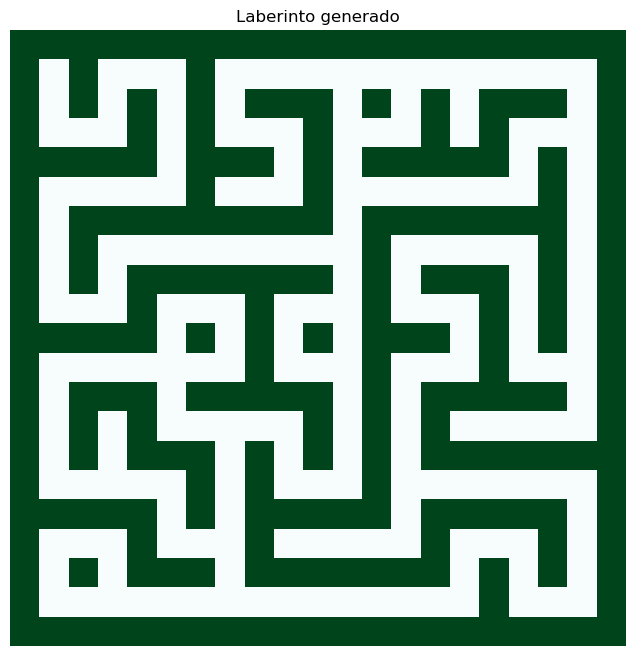

In [76]:
# Convertir el laberinto (lista de listas con '0' y '1') en un array NumPy de enteros
laberinto_array = np.array(laberinto_conectado, dtype=int)

# Visualización con matplotlib
plt.figure(figsize=(8,8))
plt.imshow(laberinto_array, cmap="BuGn")  # 'binary' pone 0 en blanco y 1 en negro
plt.title("Laberinto generado")
plt.axis("off")
plt.show()

# Muestra Inicio, Fin

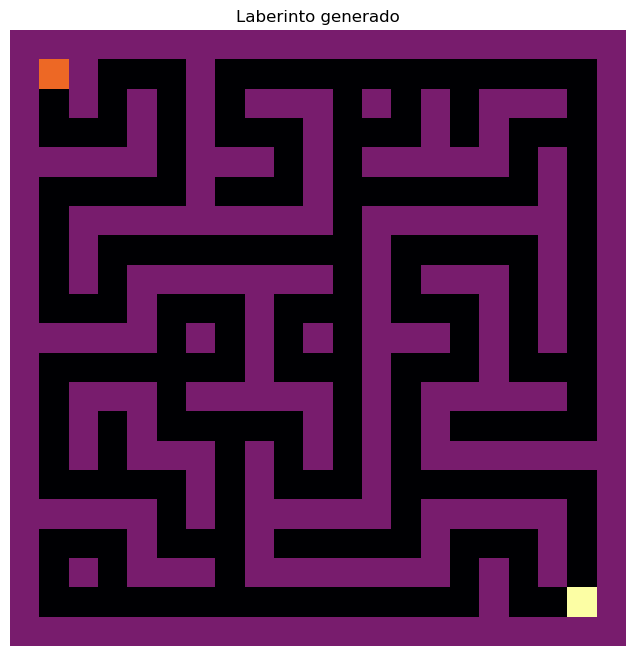

In [77]:
origen = (1, 1)
destino = (len(laberinto_array)-2, len(laberinto_array[0])-2)
laberinto_indicacion = laberinto_array.copy()

for(x, y) in [origen]:
    laberinto_indicacion[x][y] = 2
for(x, y) in [destino]:
    laberinto_indicacion[x][y] = 3


plt.figure(figsize=(8,8))
plt.imshow(laberinto_indicacion, cmap="inferno")
plt.title("Laberinto generado")
plt.axis("off")
plt.show()

# Muestra parcialmente la ruta tomada.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from collections import deque

# --- BFS paso a paso con almacenamiento de frames ---
def bfs_animado(laberinto, origen, destino):
    filas, columnas = laberinto.shape
    visitado = np.full((filas, columnas), False)
    padres = {}
    movimientos = [(-1,0),(1,0),(0,-1),(0,1)]
    
    cola = deque([origen])
    visitado[origen] = True
    
    frames = []  # guardaremos cada estado
    
    while cola:
        x, y = cola.popleft()
        
        # Guardar frame del estado actual
        frame = laberinto.copy()
        frame[origen] = 2
        frame[destino] = 3
        for (vx, vy), v in np.ndenumerate(visitado):
            if v:
                if frame[vx, vy] == 0:
                    frame[vx, vy] = 5  # celdas visitadas
        frames.append(frame)
        
        if (x, y) == destino:
            # reconstruir camino
            camino = []
            while (x, y) != origen:
                camino.append((x, y))
                x, y = padres[(x, y)]
            camino.append(origen)
            camino.reverse()
            
            # Agregar frames del camino final
            for (cx, cy) in camino:
                frame = frames[-1].copy()
                frame[cx, cy] = 4  # marcar camino
                frames.append(frame)
            return frames
        
        for dx, dy in movimientos:
            nx, ny = x+dx, y+dy
            if (0 <= nx < filas and 0 <= ny < columnas and
                not visitado[nx, ny] and laberinto[nx, ny] == 0):
                visitado[nx, ny] = True
                padres[(nx, ny)] = (x, y)
                cola.append((nx, ny))
    
    return frames  # si no hay solución


# Generar frames del BFS
frames = bfs_animado(laberinto_array, origen, destino)

# --- Crear animación ---
fig, ax = plt.subplots(figsize=(6,6))
img = ax.imshow(frames[0], cmap="inferno", animated=True)
ax.axis("off")

def update(frame):
    img.set_array(frame)
    return [img]

ani = FuncAnimation(fig, update, frames=frames, interval=100, blit=True)

# Guardar como GIF
ani.save("laberinto.gif", writer=PillowWriter(fps=10))

plt.close(fig)  # cerrar figura para que no se repita al exportar

print("✅ GIF generado: 'laberinto.gif'")


✅ GIF generado: 'laberinto.gif'


In [75]:
# Muestra el recorrido del laberinto completo 